# Hypothesis testing for honors
---

## Dataset used
---
**Students Exam Scores: Extended Dataset Exam scores for students at a public school**

URL: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

_This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them._

### Data Dictionary (column description)
---
- **Gender**: Gender of the student (male/female)
- **EthnicGroup**: Ethnic group of the student (group A to E)
- **ParentEduc**: Parent(s) education background (from some_highschool to master's degree)
- **LunchType**: School lunch type (standard or free/reduced)
- **TestPrep**: Test preparation course followed (completed or none)
- **ParentMaritalStatus**: Parent(s) marital status (married/single/widowed/divorced)
- **PracticeSport**: How often the student parctice sport (never/sometimes/regularly))
- **IsFirstChild**: If the child is first child in the family or not (yes/no)
- **NrSiblings**: Number of siblings the student has (0 to 7)
- **TransportMeans**: Means of transport to school (schoolbus/private)
- **WklyStudyHours**: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- **MathScore**: math test score(0-100)
- **ReadingScore**: reading test score(0-100)
- **WritingScore**: writing test score(0-100)

### Hypothesis Testing done

1. [Is there any significant difference in test scores between male and female students?](#1.-Hypothesis-testing---Is-there-any-significant-difference-in-test-scores-between-male-and-female-students?)
2. [Do students who have completed Test_Prep score higher on average than students who didn't?](#2.-Hypothesis-testing---Do-students-who-have-completed-Test_Prep-score-higher-on-average-than-students-who-didn't?)
3. [Does parent's education have any influence on student scores?](#3.-Hypothesis-testing---Does-parent's-education-have-any-influence-on-student-scores?)
4. [Determine if the proportion of students who have completed test prep is significantly different based on their Gender](#4.-Hypothesis-testing---Determine-if-the-proportion-of-students-who-have-completed-test-prep-is-significantly-different-based-on-their-Gender)

## Code Start
---

In [108]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats 
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

## Import data, clean, enrich and understand
---

In [109]:
df = pd.read_csv('data/students_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'EthnicGroup':'Ethnic_Group','LunchType':'Lunch_Type',
                   'TestPrep':'Test_Prep','MathScore':'Math_Score',
                  'ReadingScore':'Reading_Score','WritingScore':'Writing_Score','ParentEduc':'Parents_Edu'})

df['Total_Score'] = df['Math_Score']+df['Reading_Score']+df['Writing_Score']

Check sample `head`, `info` and `describe`

In [110]:
df.head()

,Gender,Ethnic_Group,Parents_Edu,Lunch_Type,Test_Prep,Math_Score,Reading_Score,Writing_Score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         30641 non-null  object
 1   Ethnic_Group   30641 non-null  object
 2   Parents_Edu    30641 non-null  object
 3   Lunch_Type     30641 non-null  object
 4   Test_Prep      30641 non-null  object
 5   Math_Score     30641 non-null  int64 
 6   Reading_Score  30641 non-null  int64 
 7   Writing_Score  30641 non-null  int64 
 8   Total_Score    30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [112]:
df.describe()

,Math_Score,Reading_Score,Writing_Score,Total_Score
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,66.749355,69.624980,68.468327,204.842662
std,15.206049,14.671572,15.307814,42.994898
min,0.000000,10.000000,5.000000,27.000000
25%,56.000000,60.000000,58.000000,176.000000
50%,67.000000,70.000000,69.000000,206.000000
75%,78.000000,80.000000,79.000000,236.000000
max,100.000000,100.000000,100.000000,300.000000


### Initial observations
---

- There are no NULL values
- There are 9 features, with 30641 records

## 1. Hypothesis testing - Is there any significant difference in test scores between male and female students?
---

$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the total test scores of female and male students. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} \ne 0 $ There is a difference between the total test scores of female and male students.

---

The equal sign in the null hypothesis indicates that it is a **2-tailed test**.

A **two-tailed test** is a statistical hypothesis test that _examines whether there is a significant difference between two groups or conditions in any direction_. It is called "two-tailed" because <u>it looks for differences in both tails, or extremes, of a distribution</u>.

In a hypothesis test, we have a null hypothesis (H₀) that assumes there is no significant difference between the groups or conditions being compared. The alternative hypothesis (H₁), on the other hand, suggests that there is a significant difference.

In a two-tailed test, we are interested in detecting differences in either direction. We want to determine if the observed difference between the groups is significant, regardless of whether it is positive or negative. This type of test is appropriate when we have no specific expectation or prior belief about the direction of the difference.

To perform a two-tailed test, we collect data from the two groups or conditions and analyze it using an appropriate statistical test, such as the t-test or z-test. The test calculates a p-value, which represents the probability of observing a difference as extreme as the one observed, assuming the null hypothesis is true.

If the p-value is smaller than a predetermined significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant difference between the groups. However, we do not make any specific claim about the direction of the difference—only that a significant difference exists.

In summary, a two-tailed test is a statistical hypothesis test that examines whether there is a significant difference between groups or conditions in any direction. It allows us to detect differences without assuming a specific directionality.
    
### Decision criteria
![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing_3.png)

To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025.

**Get all observations of the male and female students**

In [113]:
female=df.loc[df.Gender=="female"]
male=df.loc[df.Gender=="male"]


Now, let's select the total scores for females and males. Then, we will plot the distribution of 'total_scores' values for females and males using seaborn's `distplot()` function.



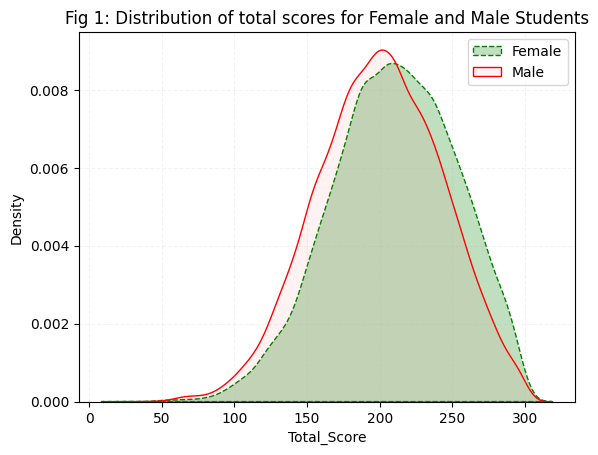

Mean value for female score is:  210.25
Mean value for male score is:  199.36


In [114]:
f_score = female.Total_Score
m_score = male.Total_Score

sns.kdeplot(f_score, color='green', fill=True, label='Female', linestyle="--")
sns.kdeplot(m_score, color='red', fill=True, label='Male', alpha=0.05)
plt.grid(True, alpha=0.15, linestyle='--')
plt.title('Fig 1: Distribution of total scores for Female and Male Students')
plt.legend()
plt.show()

print('Mean value for female score is: ',round(f_score.mean(),2))
print('Mean value for male score is: ',round(m_score.mean(),2))

We will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.


In [115]:
alpha=0.05

t_value, p_value = stats.ttest_ind(f_score, m_score)

print("t_value = ", t_value, ", p_value = ", p_value)

t_value =  22.362195264103235 , p_value =  6.972047128908246e-110


In [116]:
if p_value <alpha:
    
    print("\nConclusion: since p_value {} is less than alpha {} ". format (p_value,alpha))
    
    print("\nReject the null hypothesis that 'there is no difference between the total test scores of female and male student'.")
    
else:
    
    print("\nConclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    
    print("\nFail to reject the null hypothesis that 'there is no difference between the total test scores of female and male student'.")
    
    


Conclusion: since p_value 6.972047128908246e-110 is less than alpha 0.05 

Reject the null hypothesis that 'there is no difference between the total test scores of female and male student'.


[Go to Top](#Hypothesis-Testing-done)

## 2. Hypothesis testing - Do students who have completed Test_Prep score higher on average than students who didn't?
---

Now, let's define our null and alternative hypothesis.

$ 𝐻_{0}:\mu_{1} \leq \mu_{2} $ The average total scores of students who completed Test prep is less than or equal to students who didn't. \
$ 𝐻_{A}:\mu_{1} > \mu_{2} $ The average total scores of students who completed Test prep is greater than or equal to students who didn't.

---
The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.

---

In this example, we would like to prove (or disprove) that students who completed test prep score higher on average than students who haven't completed their test prep.

We start by comparing the mean values (𝜇) of population of students who completed test prep and students who didnt.

In [117]:
tp_completed = df.loc[df.Test_Prep == "completed"]
tp_completed_scores = tp_completed.Total_Score

tp_completed_mean = tp_completed_scores.mean()


tp_none = df.loc[df.Test_Prep == "none"]
tp_none_scores = tp_none.Total_Score

tp_none_mean = tp_none_scores.mean()

print("\nAvg. scores of students who completed their Test Prep",round(tp_completed_mean,2))
print("\nAvg. scores of students who did take their Test Prep",round(tp_none_mean,2))


Avg. scores of students who completed their Test Prep 218.46

Avg. scores of students who did take their Test Prep 197.67


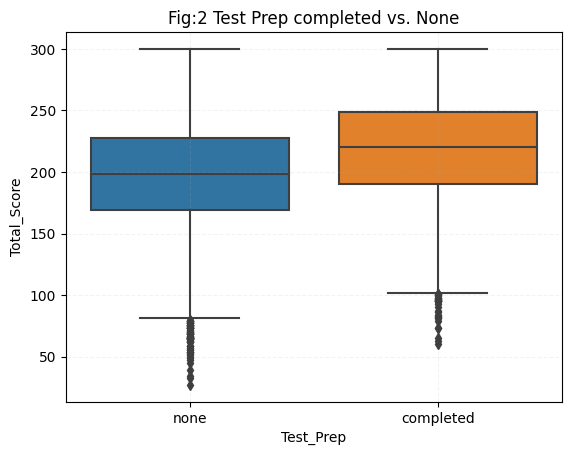

In [118]:
sns.boxplot(y=df.Total_Score,
            x=df.Test_Prep,
            data=df).set(title="Fig:2 Test Prep completed vs. None")

plt.grid(True, alpha=0.15, linestyle='--')

In [119]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(tp_completed_scores, tp_none_scores)

p_value_onetail= p_value2/2

print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 41.357836740961034 , p_value =0.0 , p_value_onetail = 0.0


In [120]:
if p_value2 <alpha:
    
    print("\nConclusion: since p_value2 {} is less than alpha {} ". format (p_value1,alpha))
    
    print("\nReject the null hypothesis that 'the average total scores of students who completed Test prep is less than or equal to students who didn't'.")
    
else:
    
    print("\nConclusion: since p_value2 {} is greater than alpha {} ". format (p_value1,alpha))
    
    print("\nFail to reject the null hypothesis that 'The average total scores of students who completed Test prep is greater than or equal to students who didn't.'.")
    
    


Conclusion: since p_value2 6.972047128908246e-110 is less than alpha 0.05 

Reject the null hypothesis that 'the average total scores of students who completed Test prep is less than or equal to students who didn't'.


### 2.1 Find the number of students based on Test prep completed and none who fall outside the 25th percentile
---

In [121]:
q1, q3 = np.percentile(df.Total_Score, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

#create conditions to isolate the outliers
outliers = df[(df.Total_Score < lower_bound) | (df.Total_Score > upper_bound)]

outliers['Test_Prep'].value_counts()

Test_Prep
none         97
completed    12
Name: count, dtype: int64

**Conclusion** - 12 students who completed test prep fall below the 25th percentil, while 97 students who did not take test prep fall below the 25th percentile, validating the rejection of the null hypothesis.

[Go to Top](#Hypothesis-Testing-done)

## 3. Hypothesis testing - Does parent's education have any influence on student scores?
---
In this example, using the statistical evidence, we will compare the scores of students based on their parent's education to determine if parent's education has any influence on the student scores.

**Data transformation**

We need to transform the data as the `df['Parents_Edu'].value_counts()` has many features which are almost similar.
First, we will combine `some high school` and `high school` into one category and leave the rest as is.

---

Now, let's define our null and alternative hypothesis.

$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean Total_Score of students whose parent's varying education level are the same. \
$ 𝐻_{A}: $ At least one of the means for the Total_Score is not the same.

For this example, we will use a one-way ANOVA and f-score statistic to **evaluate the variances** of these five different populations. We will set alpha value to be 0.05.


In [122]:
df['Parents_Edu'].value_counts()

Parents_Edu
some college          7048
high school           6031
some high school      5907
associate's degree    5902
bachelor's degree     3600
master's degree       2153
Name: count, dtype: int64

### Merge `some high school` to `high school`

In [123]:
df['Parents_Edu'] = np.where(df['Parents_Edu']=='some high school', 'high school', df['Parents_Edu'])
df['Parents_Edu'].unique().tolist()

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school']

### Average scores of students based on parent's education

In [124]:
df.groupby(by='Parents_Edu')['Total_Score'].mean().sort_values(ascending=False)

Parents_Edu
master's degree       222.616349
bachelor's degree     217.434167
associate's degree    210.270756
some college          204.785187
high school           195.190484
Name: Total_Score, dtype: float64

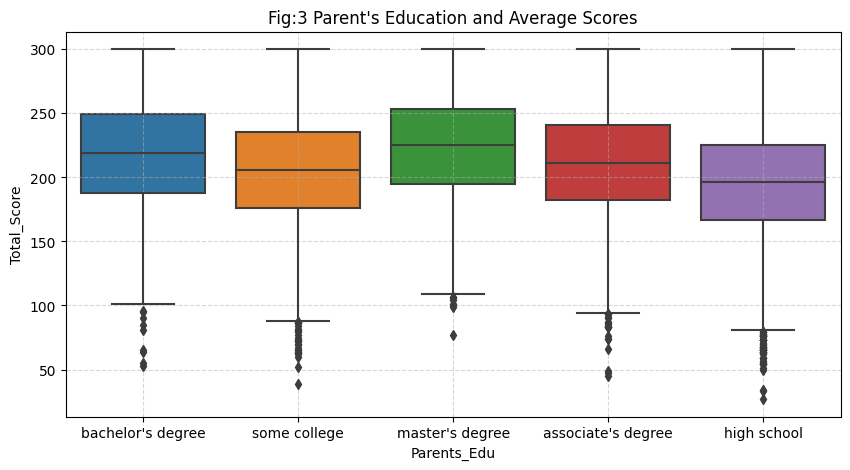

In [125]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Parents_Edu", y="Total_Score", data=df).set(title="Fig:3 Parent's Education and Average Scores")

plt.grid(True, alpha = 0.5, linestyle='--')
plt.show()

Now, we will construct the ANOVA table and check for each groups count (masters, bachelors, associats, college, high school education of parents) against the Total_Score values

In [126]:
formula = 'Total_Score ~ C(Parents_Edu)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Parents_Edu),4.0,2.537026e+06,634256.506379,359.15054,9.464830e-303
Residual,30636.0,5.410289e+07,1765.990679,NaN,NaN


Conclusion. p-value is significantly less than the alpha (0.05), therefore we reject the null hypothesis and conclude that the mean Total_Score of students whose parent's varying education level are **NOT** the same.

[Go to Top](#Hypothesis-Testing-done)

## 4. Hypothesis testing - Determine if the proportion of students who have completed test prep is significantly different based on their Gender
---


First, let's define our null and alternative hypothesis.

---
$ 𝐻_{0} $: Gender does not play a role in the completion of Test Prep. \
$ 𝐻_{A} $: Gender plays a role in the completion (or non-completion) of Test Prep.

---

Here, we are comparing two different categorical variables, male/female and test prep completed or non. For this type of analysis, we will perform a chi-square test.


In [127]:
contingency= pd.crosstab(df.Test_Prep, df.Gender)
contingency

Gender,female,male
Test_Prep,,
completed,5363,5210
none,10061,10007


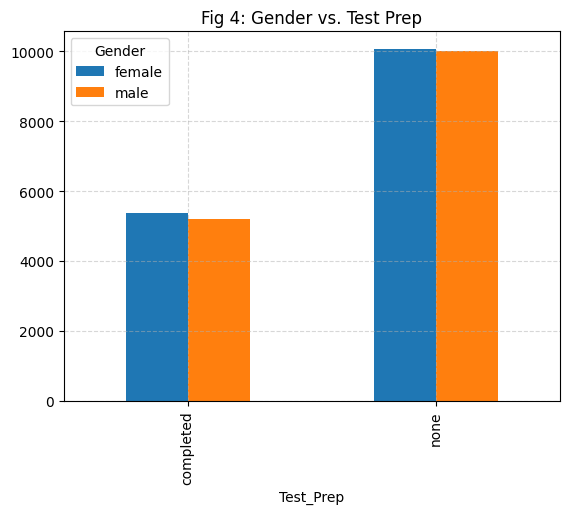

In [128]:
contingency.plot(kind='bar')
plt.title('Fig 4: Gender vs. Test Prep')
plt.grid(True, alpha = 0.5, linestyle='--')

In [129]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)

print('chi-square statistic: {},\np_value: {}, \ndegree of freedom: {}, \n\
expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 0.9609651514484187,
p_value: 0.3269438283235091, 
degree of freedom: 1, 
expected frequencies: [[ 5322.21376587  5250.78623413]
 [10101.78623413  9966.21376587]] 


In [131]:
alpha = 0.05

if p_val < alpha:
    
    print("\nConclusion: since p_val {} is less than alpha {} ". format (p_val,alpha))
    
    print("\nReject the null hypothesis that 'Gender does not play a role in the completion of Test Prep'.")
    
else:
    
    print("\nConclusion: since p_val {} is greater than alpha {} ". format (p_val,alpha))
    
    print("\nFail to reject the null hypothesis that 'Gender does not play a role in the completion of Test Prep'")
    print('\nTherefore, Gender (Females) shows a higher tendency to complete Test Prep than Males.')
    


Conclusion: since p_val 0.3269438283235091 is greater than alpha 0.05 

Fail to reject the null hypothesis that 'Gender does not play a role in the completion of Test Prep'

Therefore, Gender (Females) shows a higher tendency to complete Test Prep than Males.


[Go to Top](#Hypothesis-Testing-done)

------- END ------